# Análisis de código fuente de repositorios (líneas de código)
Este análisis netamente considera las líneas de código (LOC) de cada repositorio.

## Cargar dependencias

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Cargar archivo CSV de entrada

In [10]:
# generamos DF a partir de CSV de entrada
input_file = '../csvs/cloc_output.csv'
raw_df = pd.read_csv(input_file)
raw_df

,project_id,language,files,blank,comment,code
0,0xEduardo_nodeless,JSON,2,0,0,1493
1,0xEduardo_nodeless,Markdown,1,41,0,75
2,0xEduardo_nodeless,JavaScript,1,7,0,34
3,0xEduardo_nodeless,YAML,1,5,0,32
4,0xEduardo_nodeless,SUM,5,53,0,1634
...,...,...,...,...,...,...
5370,zotoio_github-task-manager,Bourne,Shell,2,6,2
5371,zotoio_github-task-manager,Dockerfile,1,4,0,12
5372,zotoio_github-task-manager,SVG,1,0,0,1
5373,zotoio_github-task-manager,Text,1,0,0,1


Copiamos este DataFrame para convertir el tipo de dato de las columnas a numérico

In [11]:
df = raw_df.copy()
df['files'] = pd.to_numeric(df['files'], errors='coerce')
df['blank'] = pd.to_numeric(df['blank'], errors='coerce')
df['comment'] = pd.to_numeric(df['comment'], errors='coerce')
df['code'] = pd.to_numeric(df['code'], errors='coerce')

In [12]:
# guardamos el nuevo DataFrame en un nuevo CSV
output_file = '../temp_data/merged_code_analysis_2.csv'
df.to_csv(output_file, index=False)

In [13]:
filtered_df = df[df['language'] == 'SUM']
filtered_df

,project_id,language,files,blank,comment,code
4,0xEduardo_nodeless,SUM,5.00,53.00,0,1634
9,0xayot_waas,SUM,8.00,71.00,12,32666
15,20minutes_serverless-github-check,SUM,23.00,334.00,31,2270
21,20minutes_serverless-provisioned-memory-report,SUM,17.00,161.00,7,1006
32,2amigos_laravel-mail-api,SUM,93.00,766.00,1210,16761
...,...,...,...,...,...,...
5340,zacbe_url-shortener,SUM,13.00,53.00,26,3634
5346,zinxon_CantekWebApp-BE,SUM,100.00,482.00,185,24440
5351,zkcloudworker_zkcloudworker-aws,SUM,65.00,466.00,751,7465
5361,zommerfelds_website-cz,SUM,49.00,337.00,364,14937


In [14]:
# guardamos el nuevo DataFrame en un nuevo CSV
output_file = '../temp_data/code_analysis_sum_per_repo.csv'
filtered_df.to_csv(output_file, index=False)

## Análisis estadístico

In [15]:
# resumen estadístico de la columna 'code'
loc_repos_summary = filtered_df['code'].describe()

# máximo
max_value = filtered_df['code'].max()

# mínimo
min_value = filtered_df['code'].min()

# rango (diferencia entre máximo y mínimo)
range_value = max_value - min_value

# mediana
median_value = filtered_df['code'].median()

# varianza
variance_value = filtered_df['code'].var()

# desviación estándar
std_deviation_value = filtered_df['code'].std()

# para imprimir los resultados sin notación científica
pd.options.display.float_format = '{:.2f}'.format

# mostrar los resultados
print("Resumen estadístico:")
print(loc_repos_summary)
print("\nMáx.:", max_value)
print("Mín.:", min_value)
print("Rango:", range_value)
print("Median:", median_value)
print("Varianza:", variance_value)
print("Standard deviation:", std_deviation_value)

Resumen estadístico:
count       663.00
mean      72655.75
std      297446.31
min          54.00
25%        3389.00
50%       12918.00
75%       23402.50
max     3830066.00
Name: code, dtype: float64

Máx.: 3830066
Mín.: 54
Rango: 3830012
Median: 12918.0
Varianza: 88474306755.26048
Standard deviation: 297446.3090294793


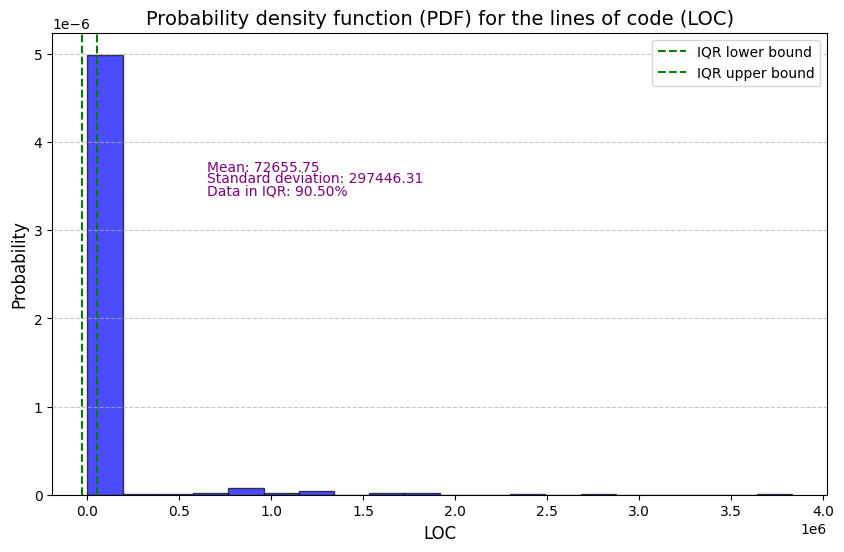

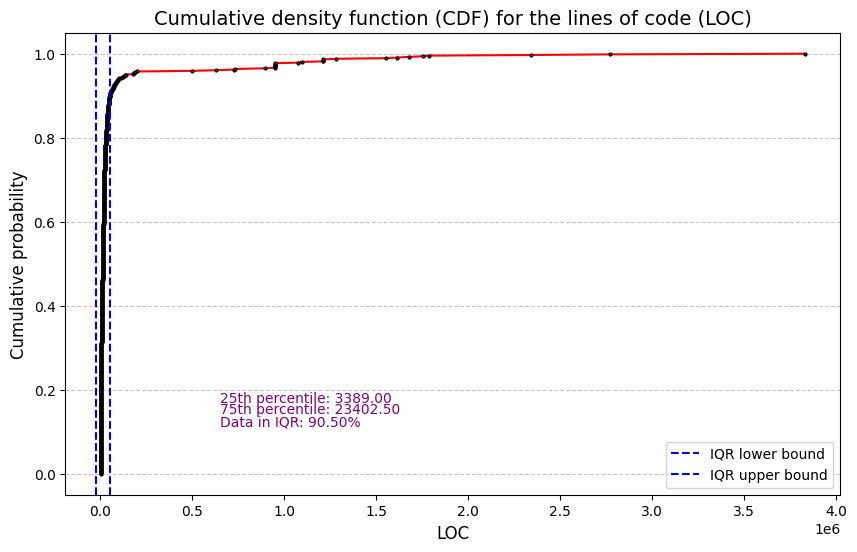

In [16]:
# extraer la columna 'code'
loc_repos_data = filtered_df['code']

# calcular el rango intercuartil (IQR)
Q1 = loc_repos_data.quantile(0.25)
Q3 = loc_repos_data.quantile(0.75)
IQR = Q3 - Q1

# calcular el porcentaje de valores dentro de los límies del IQR
iqr_lower_bound = Q1 - 1.5 * IQR
iqr_upper_bound = Q3 + 1.5 * IQR
percentage_in_iqr = ((loc_repos_data >= iqr_lower_bound) & (loc_repos_data <= iqr_upper_bound)).mean() * 100

# Probability Density Function (PDF)
fig_pdf, ax_pdf = plt.subplots(figsize=(10, 6))
ax_pdf.hist(loc_repos_data, bins=20, density=True, alpha=0.7, color='blue', edgecolor='black')
ax_pdf.set_xlabel('LOC', fontsize=12)
ax_pdf.set_ylabel('Probability', fontsize=12)
ax_pdf.set_title('Probability density function (PDF) for the lines of code (LOC)', fontsize=14)
ax_pdf.tick_params(axis='both', labelsize=10)
ax_pdf.grid(axis='y', linestyle='--', alpha=0.7)
ax_pdf.text(0.2, 0.7, 'Mean: {:.2f}'.format(loc_repos_data.mean()), transform=ax_pdf.transAxes, fontsize=10, color='purple')
ax_pdf.text(0.2, 0.675, 'Standard deviation: {:.2f}'.format(loc_repos_data.std()), transform=ax_pdf.transAxes, fontsize=10, color='purple')
ax_pdf.text(0.2, 0.650, f'Data in IQR: {percentage_in_iqr:.2f}%', transform=ax_pdf.transAxes, fontsize=10, color='purple')
ax_pdf.axvline(iqr_lower_bound, color='green', linestyle='--', label='IQR lower bound')
ax_pdf.axvline(iqr_upper_bound, color='green', linestyle='--', label='IQR upper bound')
ax_pdf.legend(loc='upper right', fontsize=10)
pdf_file = '../paper/figs/pdf_loc_repos.pdf'
fig_pdf.savefig(pdf_file, format='pdf', dpi=300)

# Cumulative Density Function (CDF)
fig_cdf, ax_cdf = plt.subplots(figsize=(10, 6))
sorted_data = np.sort(loc_repos_data)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax_cdf.plot(sorted_data, y, marker='.', linestyle='-', color='red', markersize=4, markeredgecolor='black')
ax_cdf.set_xlabel('LOC', fontsize=12)
ax_cdf.set_ylabel('Cumulative probability', fontsize=12)
ax_cdf.set_title('Cumulative density function (CDF) for the lines of code (LOC)', fontsize=14)
ax_cdf.tick_params(axis='both', labelsize=10)
ax_cdf.grid(axis='y', linestyle='--', alpha=0.7)
ax_cdf.text(0.2, 0.2, '25th percentile: {:.2f}'.format(np.percentile(sorted_data, 25)), transform=ax_cdf.transAxes, fontsize=10, color='purple')
ax_cdf.text(0.2, 0.175, '75th percentile: {:.2f}'.format(np.percentile(sorted_data, 75)), transform=ax_cdf.transAxes, fontsize=10, color='purple')
ax_cdf.text(0.2, 0.150, f'Data in IQR: {percentage_in_iqr:.2f}%', transform=ax_cdf.transAxes, fontsize=10, color='purple')
ax_cdf.axvline(iqr_lower_bound, color='blue', linestyle='--', label='IQR lower bound')
ax_cdf.axvline(iqr_upper_bound, color='blue', linestyle='--', label='IQR upper bound')
ax_cdf.legend(loc='lower right', fontsize=10)
cdf_file = '../paper/figs/cdf_loc_repos.pdf'
fig_cdf.savefig(cdf_file, format='pdf', dpi=300)

# Display the plots
plt.show()



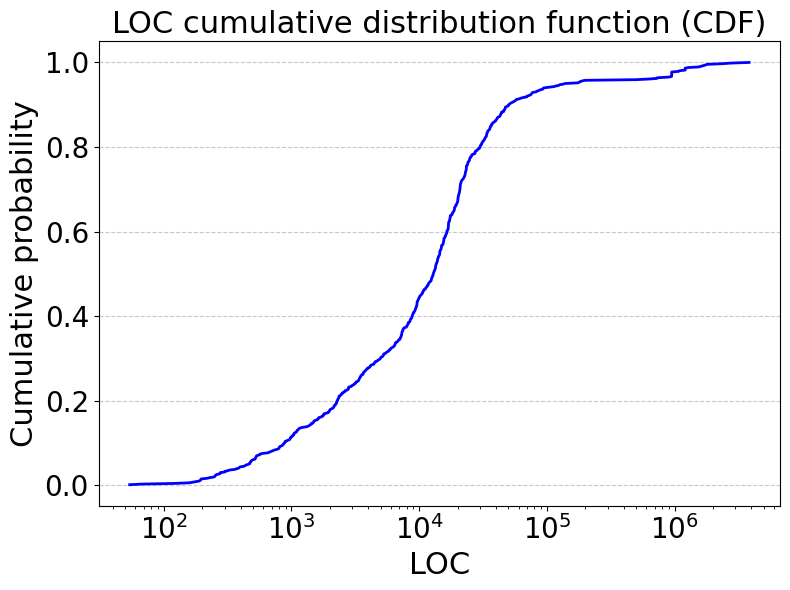

In [17]:
# crear 1 subplot
fig, ax2 = plt.subplots(figsize=(8, 6))

# calcular y graficar la función de distribución acumulada (CDF)
sorted_data = np.sort(loc_repos_data)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax2.plot(sorted_data, y, color='blue', linewidth=2)
ax2.set_xlabel('LOC', fontsize=22)  # Increased font size
ax2.set_ylabel('Cumulative probability', fontsize=22)  # Increased font size
ax2.set_title('LOC cumulative distribution function (CDF)', fontsize=22)  # Increased font size

# personalizar gráficos
ax2.tick_params(axis='both', labelsize=20)  # Increased tick label font size
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# ajustar escala
ax2.set_xscale('log')

# ajustar espaciado entre subplots y etiquetas
plt.tight_layout()

# guardar los plots como archivos de imagen
df_file = '../paper/figs/cdf_loc_repos_log.pdf'
plt.savefig(df_file, dpi=300)  # ajustar DPI para salidas de alta resolución

# mostrar los plots
plt.show()

### Filtrado de datos aberrantes
En base a las observaciones anteriores, y a las curvas presentadas, se tiene un alto grado de varianza en torno a los valores extremos de líneas de código fuente de cada repositorio. Es posible hacer un filtrado de datos aberrantes, en base al rango intercuartil (IQR) del conjunto de datos, para obtener una gráfica y un análisis mucho más representativo, ya que el 88.12% de estos datos se encuentran en conteos que reflejan un poco mejor la realidad de la mayoría de los proyectos implementados en AWS Lambda.

In [18]:
# se remueven datos aberrantes del DataFrame
non_outliers_df = filtered_df[(filtered_df['code'] >= iqr_lower_bound) & (filtered_df['code'] <= iqr_upper_bound)]

#### Análisis estadístico

In [19]:
# resumen estadístico de la columna 'code'
loc_repos_summary_filtered = non_outliers_df['code'].describe()

# máximo
max_value_filtered = non_outliers_df['code'].max()

# mínimo
min_value_filtered = non_outliers_df['code'].min()

# rango (diferencia entre máximo y mínimo)
range_value_filtered = max_value_filtered - min_value_filtered

# mediana
median_value_filtered = non_outliers_df['code'].median()

# varianza
variance_value_filtered = non_outliers_df['code'].var()

# desviación estándar
std_deviation_value_filtered = non_outliers_df['code'].std()

# para imprimir los resultados sin notación científica
pd.options.display.float_format = '{:.2f}'.format

# mostrar los resultados
print("Resumen estadístico:")
print(loc_repos_summary_filtered)
print("\nMáx.:", max_value_filtered)
print("Mín.:", min_value_filtered)
print("Rango:", range_value_filtered)
print("Median:", median_value_filtered)
print("Varianza:", variance_value_filtered)
print("Standard deviation:", std_deviation_value_filtered)

Resumen estadístico:
count     600.00
mean    13382.60
std     12151.68
min        54.00
25%      2783.00
50%     10548.00
75%     20157.00
max     53070.00
Name: code, dtype: float64

Máx.: 53070
Mín.: 54
Rango: 53016
Median: 10548.0
Varianza: 147663316.15590152
Standard deviation: 12151.679561110124


#### Nuevos gráficos de PDF y CDF

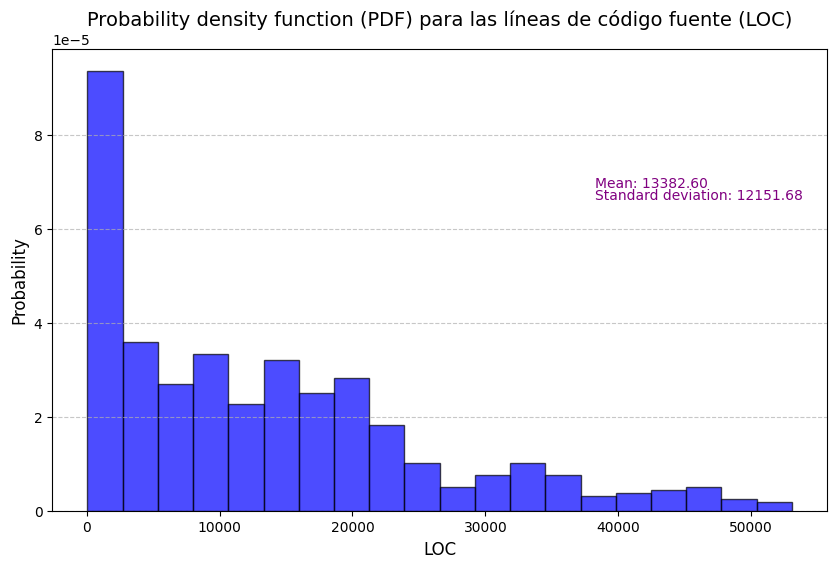

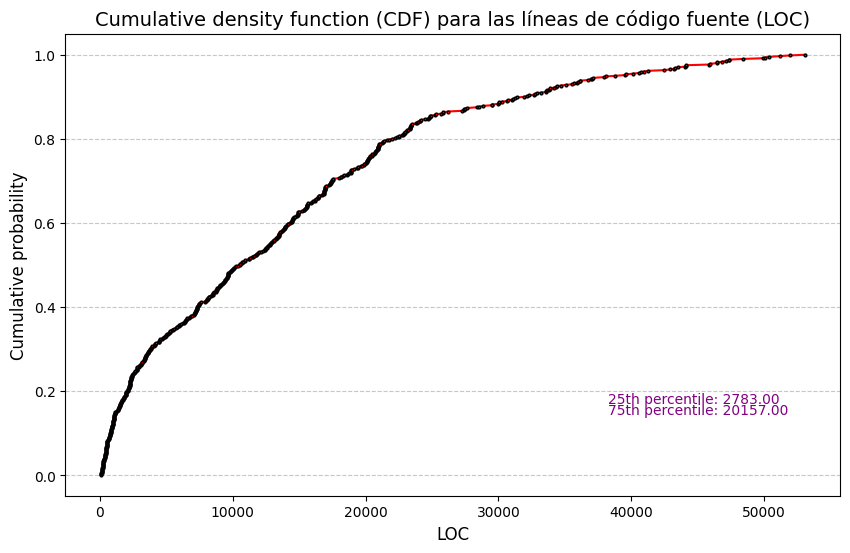

In [20]:
# extraer la columna 'code'
loc_repos_data_filtered = non_outliers_df['code']

# Probability Density Function (PDF)
fig_pdf, ax_pdf = plt.subplots(figsize=(10, 6))
ax_pdf.hist(loc_repos_data_filtered, bins=20, density=True, alpha=0.7, color='blue', edgecolor='black')
ax_pdf.set_xlabel('LOC', fontsize=12)
ax_pdf.set_ylabel('Probability', fontsize=12)
ax_pdf.set_title('Probability density function (PDF) para las líneas de código fuente (LOC)', fontsize=14)
ax_pdf.tick_params(axis='both', labelsize=10)
ax_pdf.grid(axis='y', linestyle='--', alpha=0.7)
ax_pdf.text(0.7, 0.7, 'Mean: {:.2f}'.format(loc_repos_data_filtered.mean()), transform=ax_pdf.transAxes, fontsize=10, color='purple')
ax_pdf.text(0.7, 0.675, 'Standard deviation: {:.2f}'.format(loc_repos_data_filtered.std()), transform=ax_pdf.transAxes, fontsize=10, color='purple')
pdf_file = '../paper/figs/pdf_loc_repos_filtered.pdf'
fig_pdf.savefig(pdf_file, format='pdf', dpi=300)

# Cumulative Density Function (CDF)
fig_cdf, ax_cdf = plt.subplots(figsize=(10, 6))
sorted_data_filtered = np.sort(loc_repos_data_filtered)
y = np.arange(1, len(sorted_data_filtered) + 1) / len(sorted_data_filtered)
ax_cdf.plot(sorted_data_filtered, y, marker='.', linestyle='-', color='red', markersize=4, markeredgecolor='black')
ax_cdf.set_xlabel('LOC', fontsize=12)
ax_cdf.set_ylabel('Cumulative probability', fontsize=12)
ax_cdf.set_title('Cumulative density function (CDF) para las líneas de código fuente (LOC)', fontsize=14)
ax_cdf.tick_params(axis='both', labelsize=10)
ax_cdf.grid(axis='y', linestyle='--', alpha=0.7)
ax_cdf.text(0.7, 0.2, '25th percentile: {:.2f}'.format(np.percentile(sorted_data_filtered, 25)), transform=ax_cdf.transAxes, fontsize=10, color='purple')
ax_cdf.text(0.7, 0.175, '75th percentile: {:.2f}'.format(np.percentile(sorted_data_filtered, 75)), transform=ax_cdf.transAxes, fontsize=10, color='purple')
cdf_file = '../paper/figs/cdf_loc_repos_filtered.pdf'
fig_cdf.savefig(cdf_file, format='pdf', dpi=300)

# Display the plots
plt.show()

